In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
features = pd.read_csv("C:/Users/Titoran/Documents/2.Cleaning/Regression_Data.csv", index_col = [0])

In [3]:
# Labels are the values we want to predict
labels = np.array(features['Outcome'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Outcome', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [4]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 69)

In [6]:
rf_classifier = RandomForestClassifier()

In [7]:
rf = RandomForestClassifier()

In [8]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
param_grid = {
    'n_estimators': [300],  # Number of trees in the forest
    'max_depth': [4, 6, 8, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 4, 6, 8, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

In [11]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [300]},
             scoring='accuracy')

In [12]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.7484190476190475


In [13]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7707006369426752


In [14]:
from sklearn.metrics import classification_report

In [15]:
target_names = ['class 0', 'class 1']

In [16]:
 print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.76      0.97      0.85       109
     class 1       0.83      0.31      0.45        48

    accuracy                           0.77       157
   macro avg       0.80      0.64      0.65       157
weighted avg       0.78      0.77      0.73       157



In [9]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
import shap

ModuleNotFoundError: No module named 'shap'

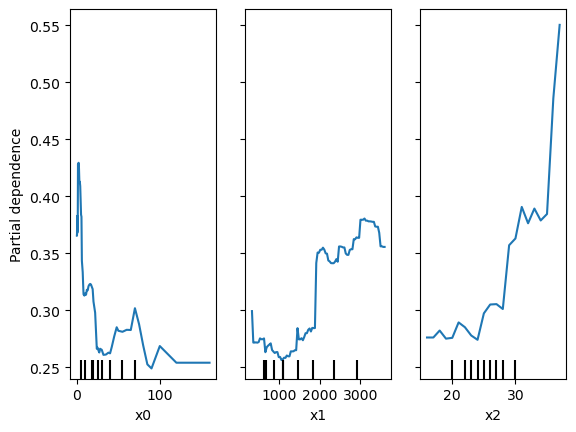

In [14]:
feature = [0,1,2]
PartialDependenceDisplay.from_estimator(rf, X_train, feature)

In [30]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [36]:
rf.feature_importances_

array([1.08797869e-01, 1.15307216e-01, 9.97072275e-02, 1.39044262e-02,
       4.36631901e-03, 6.40473668e-03, 4.15244591e-03, 4.87900325e-03,
       2.10890407e-03, 2.93330662e-03, 1.67169892e-02, 9.84801860e-03,
       1.23762442e-02, 8.55649408e-03, 1.08277249e-02, 1.00054113e-02,
       5.99457323e-03, 1.58096171e-02, 4.05295696e-03, 1.22258003e-02,
       2.99667916e-03, 1.19870330e-02, 8.32577904e-03, 1.36005494e-02,
       7.27430178e-03, 8.04242814e-03, 7.85432716e-03, 7.01031651e-03,
       1.72552237e-02, 1.73509142e-02, 6.63268961e-03, 6.03443113e-03,
       1.64401695e-03, 7.53726904e-03, 9.63824662e-03, 7.48231332e-03,
       1.26270141e-02, 3.41061070e-03, 4.96602243e-03, 1.06201770e-02,
       6.70718000e-03, 3.20027188e-03, 1.67115798e-03, 3.40862294e-03,
       3.23971752e-03, 1.16180967e-02, 5.45508079e-03, 3.75014715e-03,
       4.61650076e-03, 1.11763721e-02, 4.27848596e-03, 1.89693874e-03,
       2.23391734e-03, 2.42648808e-03, 2.59655208e-03, 5.31201616e-03,
      

<BarContainer object of 97 artists>

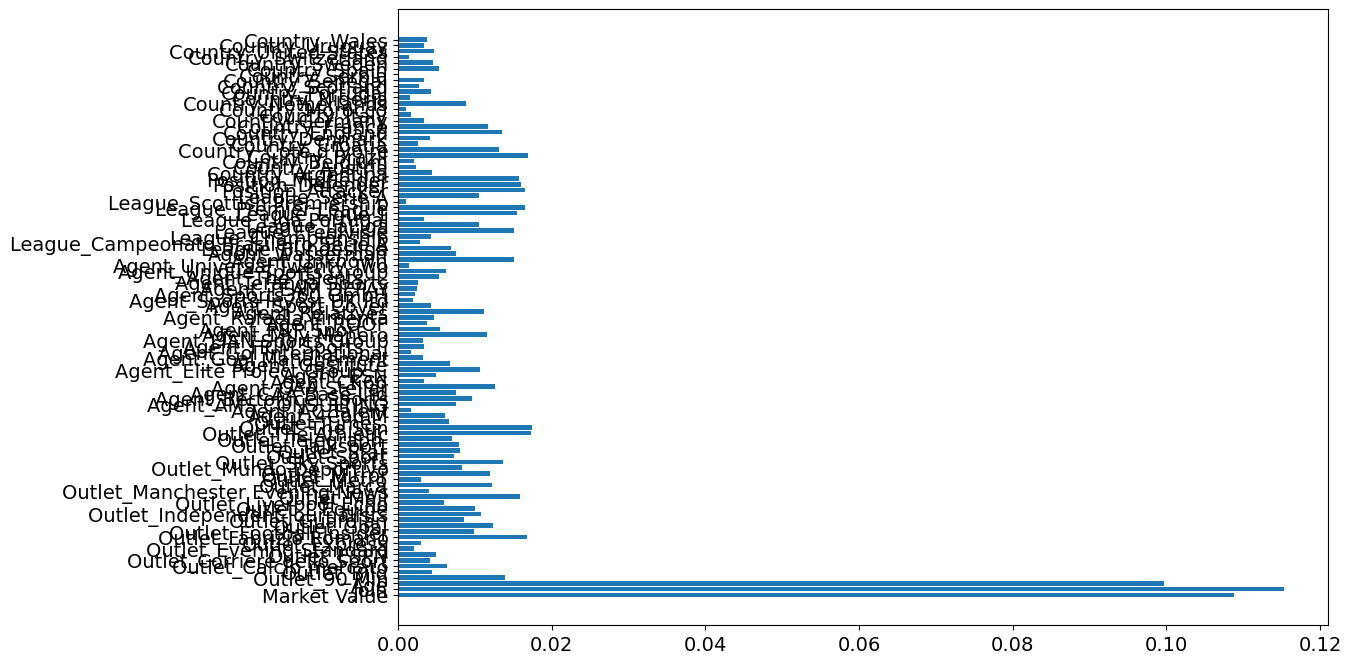

In [37]:
plt.barh(feature_list, rf.feature_importances_)

In [40]:
import shap

ModuleNotFoundError: No module named 'shap'